In [1]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from nba_api.stats.endpoints import commonplayerinfo
from nba_api.stats.static import teams
from nba_api.stats.endpoints import leaguegamelog

In [356]:
SEASON = 2007

In [357]:
leaguegamelog_info = leaguegamelog.LeagueGameLog(season= SEASON)

In [358]:
json_result = leaguegamelog_info.get_json()

In [359]:
ini_string = json.dumps(json_result) 
final_dictionary = json.loads(json_result) 

In [360]:
final_dictionary['resultSets'][0].keys()

dict_keys(['name', 'headers', 'rowSet'])

In [361]:
column_names = final_dictionary['resultSets'][0]['headers']

In [362]:
result_rows = final_dictionary['resultSets'][0]['rowSet']

In [363]:
df = pd.DataFrame(result_rows, columns = column_names)

In [364]:
df.WL.replace(to_replace=['L', 'W'], value=[0, 1], inplace = True)

In [365]:
df[df.TEAM_ABBREVIATION == 'DET']['TEAM_ID']

22      1610612765
41      1610612765
76      1610612765
126     1610612765
143     1610612765
           ...    
2326    1610612765
2367    1610612765
2398    1610612765
2424    1610612765
2445    1610612765
Name: TEAM_ID, Length: 82, dtype: int64

In [366]:
df['OPPONENT'] = df['MATCHUP'].apply(lambda L: L[-3:])

In [367]:
#df.head()

In [368]:
df['GAME_DATE'].min(), df['GAME_DATE'].max()

('2007-10-30', '2008-04-16')

In [369]:
#df.columns

In [370]:
team_list = list(df['TEAM_NAME'].unique())

In [371]:
#df[df.TEAM_ABBREVIATION == 'DET']['WL'].count()

In [372]:
detroit_data = df[df.TEAM_ABBREVIATION == 'DET']

In [373]:
#df[df.TEAM_ABBREVIATION == 'DET'].groupby('WL').WL.count()

In [374]:
#df[df.TEAM_ABBREVIATION == 'DET'].groupby('WL').mean()

In [375]:
nba_teams = teams.get_teams()

In [376]:
# sns.set(rc={'axes.facecolor': 'lavender'})  # Background color for the plot

# # Sort values by rating
# #ratings = ratings.sort_values(by=['Your Rating'])

# # Loop to create a new variable, which will turn scatterplot to a dot plot
# game_count = []

# for index, fgm in enumerate(detroit_data['FGM']):
#     subset = detroit_data.iloc[:index + 1]  # Create subset starting at the beginning of dataset until the movie itself
#     count = len(subset[subset['FGM'] == fgm])  # Count all movies from the same year in this subset
#     game_count.append(count)  # Appended counts will be used as vertical values in the scatterplot,
#     # which will help to create a dot plot

# # Data for the plot
# x = detroit_data['FGM']
# y = game_count
# hue = detroit_data['WL']

# # Dot plot created using scatter plot
# plt.figure(figsize=(10, 7))
# ax = sns.scatterplot(x, y, hue=hue, s=60, legend="full", palette="RdYlGn")
# ax.grid(False)  # Remove grid

# #ax.get_legend().remove()  # Delete default legend
# #scale_legend = plt.Normalize(hue.min() - 1, hue.max())  # Create a scale for the colormap.
# #color_map = plt.cm.ScalarMappable(cmap="RdYlGn", norm=scale_legend)  # Colormap used in legend.
# #color_map = plt.cm.ScalarMappable(cmap="RdGy")  # Colormap used in legend.
# #color_map.set_array([])  # Dummy variable needed to create a colormap.
# #ax.figure.colorbar(color_map)  # Add colormap as a legend.

# plt.xlim([20, 50])  # There are just few movies I seen from before 1950.
# plt.ylabel("Count", size=14)
# plt.xlabel("FGM", size=14)
# plt.title("FGM by Game", size=20)
# #plt.gcf().text(0.83, 0.5, "Rating", fontsize=14, rotation=90)  # Label used for colormap.
# plt.show()

In [377]:
#df.FG_PCT.mean()

In [378]:
fg_pct_mean = df.groupby('TEAM_ABBREVIATION').FG_PCT.mean()

In [379]:
team_wins = df.groupby('TEAM_ABBREVIATION').WL.sum().to_frame()

In [380]:
list(team_wins[team_wins['WL'] >= 49].index)

['BOS', 'DAL', 'DEN', 'DET', 'HOU', 'LAL', 'NOH', 'ORL', 'PHX', 'SAS', 'UTA']

In [381]:
#df.groupby('TEAM_ABBREVIATION').apply(lambda x: x[x['WL'] == 1]['WL'].sum())

In [382]:
fg_pct_mean_frame = fg_pct_mean.to_frame()
fg_pct_mean_frame.reset_index(inplace=True)
fg_pct_mean_frame = fg_pct_mean_frame.rename(columns = {'index':'TEAM_ABBREVIATION'})

In [383]:
opp_fg_pct_mean = df.groupby('OPPONENT').FG_PCT.mean()

opp_fg_pct_mean_frame = opp_fg_pct_mean.to_frame()
opp_fg_pct_mean_frame.reset_index(inplace=True)
opp_fg_pct_mean_frame = opp_fg_pct_mean_frame.rename(columns = {'OPPONENT':'TEAM_ABBREVIATION'})

In [384]:
fg_pct_mean_frame.head()

,TEAM_ABBREVIATION,FG_PCT
0,ATL,0.454634
1,BOS,0.475902
2,CHA,0.452963
3,CHI,0.435549
4,CLE,0.439012


In [385]:
fg_pct_mean_frame.describe().index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [386]:
fg_pct_mean_frame.quantile(.25, axis = 0)['FG_PCT']

0.44606707317073174

In [387]:
# col = np.where(fg_pct_mean_frame['TEAM_ABBREVIATION'] == 'DET','red',np.where(
#     fg_pct_mean_frame['TEAM_ABBREVIATION'] != 'DET','black'))

In [388]:
COLOR = fg_pct_mean_frame['TEAM_ABBREVIATION'].apply(
#     lambda x: 'red' if x in list(team_wins[team_wins['WL'] >= 49].index) 
#     else ('gold'if x == 'DET' else 'black'))

    lambda x: 'yellow' if x == 'DET' else ( 'red' if x in list(team_wins[team_wins['WL'] >= 49].index) 
    else 'black'))

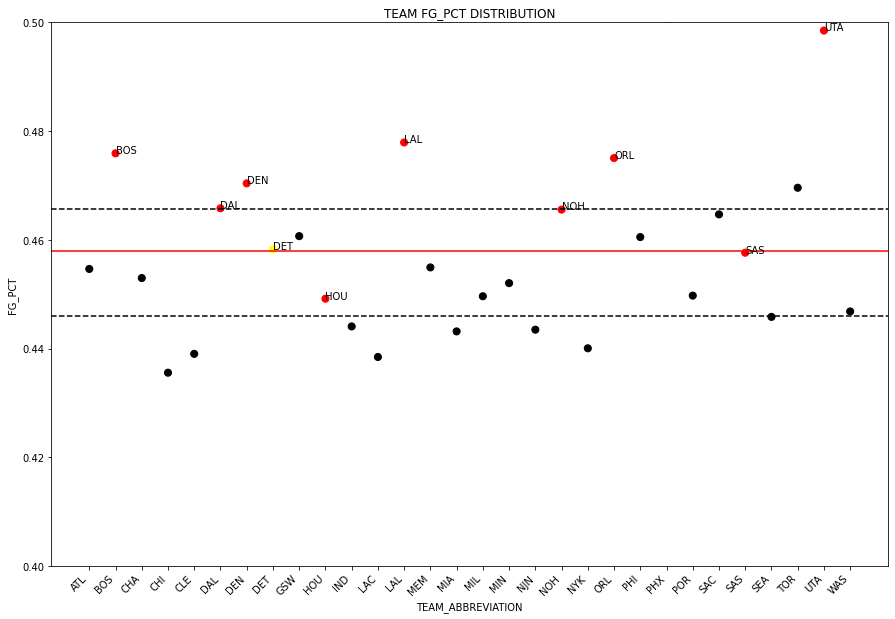

In [389]:
fg_pct_mean_frame.plot('TEAM_ABBREVIATION', 'FG_PCT', kind = 'scatter', c = COLOR, 
                       figsize=(15, 10), s = 50)
plt.axhline(y= fg_pct_mean_frame.FG_PCT.mean(), color='red', linestyle='-')
plt.axhline(y= fg_pct_mean_frame.quantile(.25, axis = 0)['FG_PCT'], color='black', linestyle='dashed')
plt.axhline(y= fg_pct_mean_frame.quantile(.75, axis = 0)['FG_PCT'], color='black', linestyle='dashed')
plt.ylim([0.40, 0.50])
plt.xticks(rotation=45, ha='right')

for team in fg_pct_mean_frame['TEAM_ABBREVIATION']:
    if team in list(team_wins[team_wins['WL'] >= 49].index):
        plt.annotate(team, 
                     (team, fg_pct_mean_frame[fg_pct_mean_frame['TEAM_ABBREVIATION'] == team]['FG_PCT']))
        
plt.title('TEAM FG_PCT DISTRIBUTION')
plt.show()

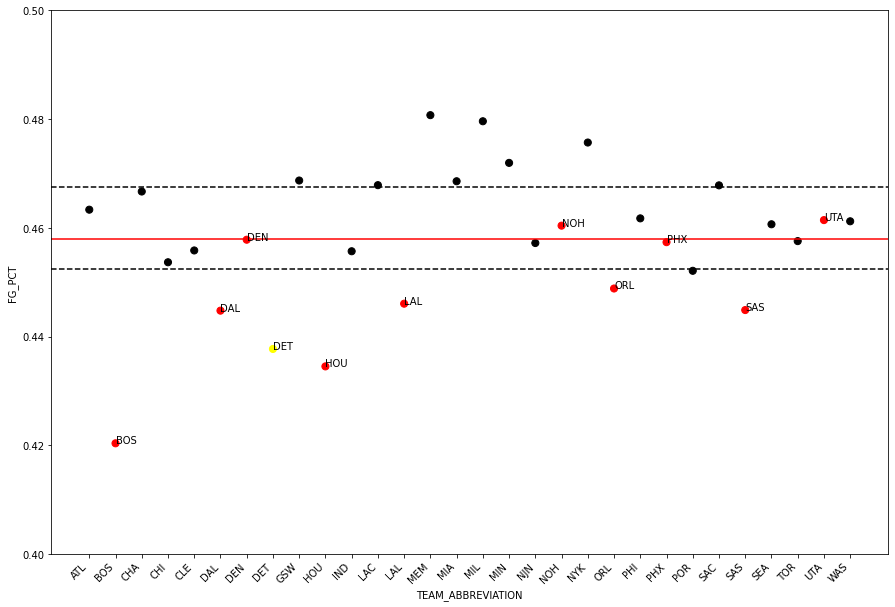

In [390]:
opp_fg_pct_mean_frame.plot('TEAM_ABBREVIATION', 'FG_PCT', kind = 'scatter', c = COLOR, 
                       figsize=(15, 10), s = 50)
plt.axhline(y= opp_fg_pct_mean_frame.FG_PCT.mean(), color='red', linestyle='-')
plt.axhline(y= opp_fg_pct_mean_frame.quantile(.25, axis = 0)['FG_PCT'], color='black', linestyle='dashed')
plt.axhline(y= opp_fg_pct_mean_frame.quantile(.75, axis = 0)['FG_PCT'], color='black', linestyle='dashed')
plt.ylim([0.40, 0.50])
plt.xticks(rotation=45, ha='right')

for team in opp_fg_pct_mean_frame['TEAM_ABBREVIATION']:
    if team in list(team_wins[team_wins['WL'] >= 49].index):
        plt.annotate(team, 
                     (team, opp_fg_pct_mean_frame[opp_fg_pct_mean_frame['TEAM_ABBREVIATION'] == team]['FG_PCT']))
        
plt.show()

In [391]:
df.columns

Index(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M',
       'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PLUS_MINUS', 'VIDEO_AVAILABLE',
       'OPPONENT'],
      dtype='object')

In [392]:
statistic = 'FG_PCT'

In [393]:
statistic_mean = df.groupby('TEAM_ABBREVIATION')[statistic].mean()

statistic_mean_frame = statistic_mean.to_frame()
statistic_mean_frame.reset_index(inplace=True)

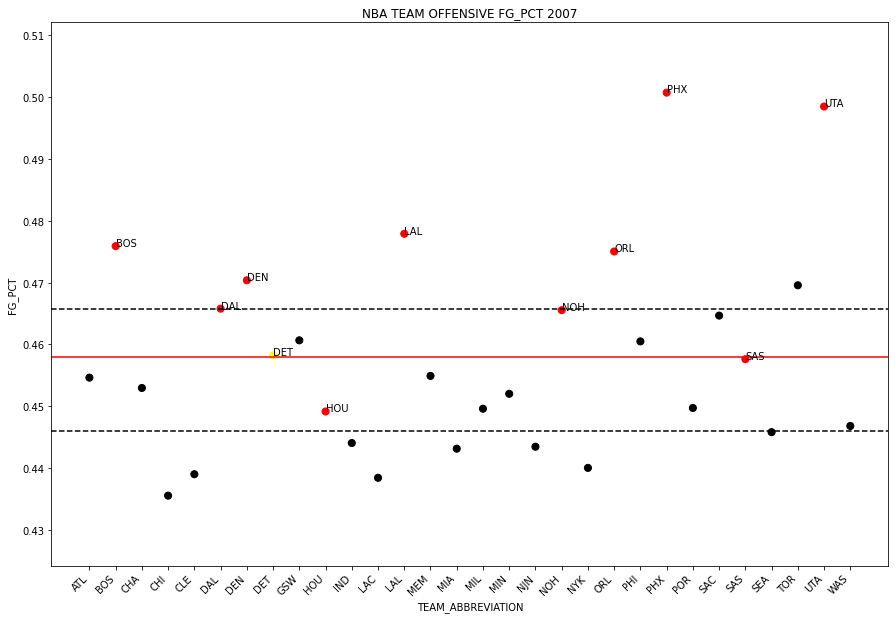

In [394]:
statistic_mean_frame.plot('TEAM_ABBREVIATION', statistic, kind = 'scatter', c = COLOR, 
                       figsize=(15, 10), s = 50)
plt.axhline(y= statistic_mean_frame[statistic].mean(), color='red', linestyle='-')
plt.axhline(y= statistic_mean_frame.quantile(.25, axis = 0)[statistic], color='black', linestyle='dashed')
plt.axhline(y= statistic_mean_frame.quantile(.75, axis = 0)[statistic], color='black', linestyle='dashed')
# plt.ylim([0.40, 0.50])
plt.xticks(rotation=45, ha='right')

plt.ylim(statistic_mean.min() - (statistic_mean.median() * .025), 
                                     statistic_mean.max() + (statistic_mean.median() * .025))

for team in statistic_mean_frame['TEAM_ABBREVIATION']:
    if team in list(team_wins[team_wins['WL'] >= 49].index):
        plt.annotate(team, 
                     (team, statistic_mean_frame[statistic_mean_frame['TEAM_ABBREVIATION'] == team][statistic]))

# plt.axhspan(statistic_mean_frame.quantile(.75, axis = 0)[statistic], 
#             plt.ylim()[1],
#             facecolor='g', alpha=0.2)

# plt.axhspan(statistic_mean_frame.quantile(.25, axis = 0)[statistic], 
#             plt.ylim()[0],
#             facecolor='r', alpha=0.2)

plt.title('NBA TEAM OFFENSIVE ' + str(statistic) + ' ' + str(SEASON))        
plt.show()

In [395]:
def_statistic_mean = df.groupby('OPPONENT')[statistic].mean()

def_statistic_mean_frame = def_statistic_mean.to_frame()
def_statistic_mean_frame.reset_index(inplace=True)
def_statistic_mean_frame = def_statistic_mean_frame.rename(columns = {'OPPONENT':'TEAM_ABBREVIATION'})

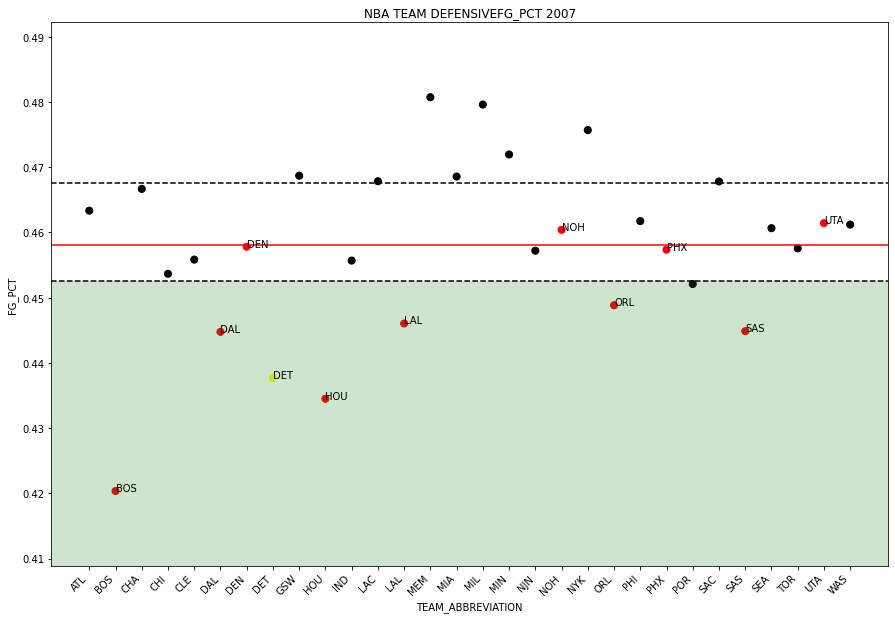

In [396]:
def_statistic_mean_frame.plot('TEAM_ABBREVIATION', statistic, kind = 'scatter', c = COLOR, 
                       figsize=(15, 10), s = 50)
plt.axhline(y= def_statistic_mean_frame[statistic].mean(), color='red', linestyle='-')
plt.axhline(y= def_statistic_mean_frame.quantile(.25, axis = 0)[statistic], color='black', linestyle='dashed')
plt.axhline(y= def_statistic_mean_frame.quantile(.75, axis = 0)[statistic], color='black', linestyle='dashed')
# plt.ylim([0.40, 0.50])
plt.xticks(rotation=45, ha='right')
plt.ylim(def_statistic_mean.min() - (def_statistic_mean.median() * .025), 
                                     def_statistic_mean.max() + (def_statistic_mean.median() * .025))

for team in def_statistic_mean_frame['TEAM_ABBREVIATION']:
    if team in list(team_wins[team_wins['WL'] >= 49].index):
        plt.annotate(team, 
                     (team, def_statistic_mean_frame[def_statistic_mean_frame['TEAM_ABBREVIATION'] == team][statistic]))

plt.axhspan(def_statistic_mean_frame.quantile(.25, axis = 0)[statistic], 
            plt.ylim()[0],
            facecolor='g', alpha=0.2)

# plt.legend(def_statistic_mean_frame[statistic], 
#            list(team_wins[team_wins['WL'] >= 49].index), loc = 'best')
plt.title('NBA TEAM DEFENSIVE' + str(statistic) + ' ' + str(SEASON))        
plt.show()

In [397]:
np.sort(def_statistic_mean)[::-1]

array([0.48071951, 0.47959756, 0.47568293, 0.47193902, 0.46869512,
       0.46856098, 0.46784146, 0.46780488, 0.46667073, 0.46332927,
       0.46173171, 0.46141463, 0.46119512, 0.46064634, 0.46039024,
       0.45780488, 0.45754878, 0.45735366, 0.45719512, 0.45582927,
       0.45568293, 0.45365854, 0.45208537, 0.44882927, 0.44603659,
       0.44486585, 0.4447561 , 0.43770732, 0.4345    , 0.42035366])

In [398]:
sort_statistic = 'WL'

In [399]:
df.groupby('TEAM_ABBREVIATION').mean().sort_values(
    by = sort_statistic, ascending = False)[sort_statistic].iloc[:10]

TEAM_ABBREVIATION
BOS    0.804878
DET    0.719512
LAL    0.695122
NOH    0.682927
SAS    0.682927
HOU    0.670732
PHX    0.670732
UTA    0.658537
ORL    0.634146
DAL    0.621951
Name: WL, dtype: float64

In [400]:
df.groupby('OPPONENT').mean().sort_values(
    by = sort_statistic, ascending = False)[sort_statistic].iloc[:10]

OPPONENT
MIA    0.817073
SEA    0.756098
MIN    0.731707
MEM    0.731707
LAC    0.719512
NYK    0.719512
MIL    0.682927
CHA    0.609756
CHI    0.597561
NJN    0.585366
Name: WL, dtype: float64

In [401]:
#df.groupby('TEAM_ABBREVIATION').mean().sort_values(
#    by = sort_statistic, ascending = False).drop(columns = ['TEAM_ID', 'VIDEO_AVAILABLE', 'MIN'])

In [402]:
offensive_stats_df = df.groupby('TEAM_ABBREVIATION').mean().sort_values(
    by = sort_statistic, ascending = False).drop(columns = 
                                                 ['TEAM_ID', 'VIDEO_AVAILABLE', 'MIN'])

In [403]:
defensive_stats_df = df.groupby('OPPONENT').mean().sort_values(
    by = sort_statistic, ascending = True).drop(columns = ['TEAM_ID', 'VIDEO_AVAILABLE', 'MIN'])

In [404]:
off_dic = {}

def off_color_top_10(t):

#    is_max = t > t.mean()

    if t.max() in [offensive_stats_df['TOV'].max(), offensive_stats_df['PF'].max()]:
        is_max = t < t.sort_values(ascending = False).iloc[-6]
        is_min = t > t.sort_values(ascending = False).iloc[6]
#        print(is_min)
        
        for index, row in is_max.iteritems():
            if row == True:
                if index in off_dic.keys():
                    off_dic[index] +=1
                else:
                    off_dic[index] = 1
        
        for index, row in is_min.iteritems():
            if row == True:
                if index in off_dic.keys():
                    off_dic[index] -= 1
                else:
                    off_dic[index] = -1
                    
        return ['background-color: yellow' if u else '' for u in is_max]
    
    else:
        is_max = t > t.sort_values(ascending = False).iloc[5]
        is_min = t < t.sort_values(ascending = False).iloc[-5]
#        print(is_min)

        for index, row in is_max.iteritems():
            if row == True:
                if index in off_dic.keys():
                    off_dic[index] +=1
                else:
                    off_dic[index] = 1

        for index, row in is_min.iteritems():
            if row == True:
                if index in off_dic.keys():
                    off_dic[index] -= 1
                else:
                    off_dic[index] = -1
                    
        return ['background-color: yellow' if u else '' for u in is_max]

def off_highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    if s.max() in [offensive_stats_df['TOV'].max(), offensive_stats_df['PF'].max()]:
        is_max = s == s.sort_values(ascending = False).min()
        return ['background-color: orange' if u else '' for u in is_max]

    else:
        is_max = s == s.sort_values(ascending = False).max()
        return ['background-color: orange' if u else '' for u in is_max]

#print("\nHighlight the top 10 values in each column:")
#offensive_stats_df.drop(columns = ['WL']).style.apply(off_color_top_10)

print("\nTop Offensive Teams in NBA:")
with pd.option_context('display.precision', 3):
    html =\
(offensive_stats_df.drop(columns = ['WL']).style.\
apply(off_color_top_10).\
apply(off_highlight_max))

html
html.to_excel("Offensive_Stats_" + str(SEASON) + ".xlsx",
             sheet_name=str(SEASON))


Top Offensive Teams in NBA:


In [405]:
sorted(off_dic.items(), key=lambda x:x[1])

[('LAC', -9),
 ('MIA', -7),
 ('NYK', -4),
 ('MIN', -4),
 ('POR', -3),
 ('NJN', -3),
 ('PHI', -3),
 ('SEA', -2),
 ('SAS', -2),
 ('MEM', -1),
 ('CHA', -1),
 ('MIL', -1),
 ('BOS', 0),
 ('CLE', 0),
 ('ATL', 0),
 ('NOH', 0),
 ('SAC', 0),
 ('HOU', 0),
 ('WAS', 0),
 ('IND', 1),
 ('CHI', 1),
 ('DAL', 1),
 ('TOR', 2),
 ('ORL', 3),
 ('DET', 3),
 ('GSW', 6),
 ('UTA', 7),
 ('PHX', 9),
 ('DEN', 10),
 ('LAL', 12)]

In [406]:
def_dic = {}

def def_color_top_10(t):

#    is_max = t > t.mean()

    if t.max() in [defensive_stats_df['TOV'].max(), defensive_stats_df['TOV'].max()]:
        is_max = t > t.sort_values(ascending = False).iloc[6]
        is_min = t < t.sort_values(ascending = False).iloc[-5]
        
        for index, row in is_max.iteritems():
            if row == True:
                if index in def_dic.keys():
                    def_dic[index] +=1
                else:
                    def_dic[index] = 1

        for index, row in is_min.iteritems():
            if row == True:
                if index in def_dic.keys():
                    def_dic[index] -= 1
                else:
                    def_dic[index] = -1

        return ['background-color: yellow' if u else '' for u in is_max]

    else:
        is_max = t < t.sort_values(ascending = False).iloc[-6]
        is_min = t > t.sort_values(ascending = False).iloc[6]
        
        for index, row in is_max.iteritems():
            if row == True:
                if index in def_dic.keys():
                    def_dic[index] +=1
                else:
                    def_dic[index] = 1

        for index, row in is_min.iteritems():
            if row == True:
                if index in def_dic.keys():
                    def_dic[index] -= 1
                else:
                    def_dic[index] = -1  
                    
        return ['background-color: yellow' if u else '' for u in is_max]

def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    if s.max() in [defensive_stats_df['TOV'].max(), defensive_stats_df['PF'].max()]:
        is_max = s == s.sort_values(ascending = False).max()
        return ['background-color: orange' if u else '' for u in is_max]

    else:
        is_max = s == s.sort_values(ascending = False).min()
        return ['background-color: orange' if u else '' for u in is_max]

print("\nTop Defensive Teams in NBA:")
with pd.option_context('display.precision', 3):
    html =\
(defensive_stats_df.drop(columns = ['WL']).style.\
apply(def_color_top_10).\
apply(highlight_max))

html
html.to_excel("Defensive_Stats_" + str(SEASON) + ".xlsx",
             sheet_name=str(SEASON))


Top Defensive Teams in NBA:


In [407]:
sorted(def_dic.items(), key=lambda x:x[1])

[('GSW', -9),
 ('MEM', -9),
 ('SEA', -9),
 ('SAC', -9),
 ('DEN', -8),
 ('IND', -7),
 ('NYK', -5),
 ('MIN', -5),
 ('MIL', -4),
 ('NJN', -4),
 ('WAS', -3),
 ('CHI', -3),
 ('PHX', -2),
 ('LAL', -2),
 ('MIA', -2),
 ('CHA', -2),
 ('LAC', -2),
 ('ORL', 0),
 ('ATL', 1),
 ('POR', 1),
 ('CLE', 3),
 ('TOR', 3),
 ('UTA', 4),
 ('PHI', 4),
 ('DAL', 5),
 ('NOH', 6),
 ('HOU', 8),
 ('BOS', 10),
 ('SAS', 10),
 ('DET', 14)]

In [408]:
top_off_dic = {}
for index, row in offensive_stats_df.iteritems():
    if index == 'WL':
        pass
    elif index in ['TOV', 'PF']:
        if row.idxmin() in top_off_dic.keys():
            top_off_dic[row.idxmin()] +=1
        else:
            top_off_dic[row.idxmin()] = 1
    else:
        if row.idxmax() in top_off_dic.keys():
            top_off_dic[row.idxmax()] +=1
        else:
            top_off_dic[row.idxmax()] = 1
        
sorted(top_off_dic.items(), key=lambda x:x[1])

[('ORL', 1),
 ('CLE', 1),
 ('LAL', 1),
 ('HOU', 1),
 ('DET', 1),
 ('NOH', 1),
 ('BOS', 1),
 ('PHX', 2),
 ('TOR', 2),
 ('GSW', 4),
 ('DEN', 4)]

In [409]:
top_def_dic = {}
for index, row in defensive_stats_df.iteritems():
    if index == 'WL':
        pass
    elif index in ['TOV', 'PF']:
        if row.idxmax() in top_off_dic.keys():
            top_off_dic[row.idxmax()] +=1
        else:
            top_off_dic[row.idxmax()] = 1
    else:
        if row.idxmin() in top_def_dic.keys():
            top_def_dic[row.idxmin()] +=1
        else:
            top_def_dic[row.idxmin()] = 1
        
sorted(top_def_dic.items(), key=lambda x:x[1])

[('HOU', 1),
 ('POR', 1),
 ('DET', 2),
 ('DAL', 2),
 ('SAS', 2),
 ('UTA', 2),
 ('NOH', 3),
 ('BOS', 4)]

In [410]:
re_index_offensive_stats_df = offensive_stats_df.reset_index()

In [411]:
re_index_offensive_stats_df.head()

,TEAM_ABBREVIATION,WL,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS
0,BOS,0.804878,36.414634,76.658537,0.475902,7.268293,19.073171,0.376768,20.451220,26.536585,...,10.121951,31.890244,42.012195,22.353659,8.487805,4.621951,15.195122,22.731707,100.548780,10.256098
1,DET,0.719512,36.573171,79.890244,0.458232,5.939024,16.219512,0.366402,18.378049,23.963415,...,11.878049,29.548780,41.426829,22.329268,7.109756,5.756098,11.658537,20.585366,97.463415,7.390244
2,LAL,0.695122,39.609756,83.146341,0.477902,8.073171,21.353659,0.380573,21.292683,27.682927,...,10.951220,33.195122,44.146341,24.426829,7.975610,5.341463,14.097561,20.621951,108.585366,7.256098
3,NOH,0.682927,38.585366,82.878049,0.465549,7.682927,19.768293,0.382378,16.000000,20.817073,...,11.426829,30.414634,41.841463,21.768293,7.768293,3.914634,11.878049,18.670732,100.853659,5.280488
4,SAS,0.682927,35.829268,78.341463,0.457622,7.243902,19.634146,0.368915,16.463415,21.634146,...,9.402439,31.853659,41.256098,20.951220,6.353659,4.109756,12.621951,18.743902,95.365854,4.792683


In [412]:
statistic = 'FG3M'

In [413]:
def_statistic_mean = df.groupby('OPPONENT')[statistic].mean()

def_statistic_mean_frame = def_statistic_mean.to_frame()
def_statistic_mean_frame.reset_index(inplace=True)
def_statistic_mean_frame = def_statistic_mean_frame.rename(columns = {'OPPONENT':'TEAM_ABBREVIATION'})

In [414]:
c_list = []
for index, row in def_statistic_mean_frame.iterrows():
    if row['TEAM_ABBREVIATION'] in list(team_wins[team_wins['WL'] >= 49].index):
        c = 'orange'
    else:
        c = 'silver'
    c_list.append(c)


def_statistic_mean_frame['49 & Up Club'] = c_list   

In [415]:
def def_stats_grapher(statistic):
    
    if statistic in ['TOV', 'PF']:
        ascend_arg = False
        upper = .25
        down = .75
    else:
        ascend_arg = True
        upper = .75
        down = .25
        
    def_statistic_mean = df.groupby('OPPONENT')[statistic].mean()

    def_statistic_mean_frame = def_statistic_mean.to_frame()
    def_statistic_mean_frame.reset_index(inplace=True)
    def_statistic_mean_frame = def_statistic_mean_frame.rename(columns = {'OPPONENT':'TEAM_ABBREVIATION'})
    
    c_list = []
    for index, row in def_statistic_mean_frame.iterrows():
        if row['TEAM_ABBREVIATION'] in list(team_wins[team_wins['WL'] >= 49].index):
            c = 'orange'
        else:
            c = 'silver'
        c_list.append(c)


    def_statistic_mean_frame['49 & Up Club'] = c_list 

    def_statistic_mean_frame.sort_values([statistic], ascending = ascend_arg, inplace = True)
    def_statistic_mean_frame.plot(x = 'TEAM_ABBREVIATION', y = statistic, kind = 'bar', figsize=(12, 8), 
                                   color = def_statistic_mean_frame['49 & Up Club'], legend = False
                                 )

    plt.axhline(y= def_statistic_mean_frame[statistic].mean(), color='red', linestyle='-')
    plt.axhline(y= def_statistic_mean_frame.quantile(.25, axis = 0)[statistic], color='black', linestyle='dashed')
    plt.axhline(y= def_statistic_mean_frame.quantile(.75, axis = 0)[statistic], color='black', linestyle='dashed')
    # # plt.ylim([0.40, 0.50])
    # plt.xticks(rotation=45, ha='right')
    plt.ylim(def_statistic_mean.min() - (def_statistic_mean.median() * .01), 
                                         def_statistic_mean.max() + (def_statistic_mean.median() * .01))

    plt.axhspan(def_statistic_mean_frame.quantile(.75, axis = 0)[statistic], 
                plt.ylim()[1],
                facecolor='r', alpha=0.2)

    plt.axhspan(def_statistic_mean_frame.quantile(.25, axis = 0)[statistic], 
                plt.ylim()[0],
                facecolor='g', alpha=0.2)

    ax = plt.gca()
    ax.set_facecolor('white')
    ax.spines['bottom'].set_color('black')
    ax.spines['top'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.spines['left'].set_color('black')

    plt.title('NBA TEAM FOUL SHOTS GIVEN' + ' 2005-05')        
#     plt.title('NBA TEAM DEFENSIVE ' + str(statistic) + ' ' + str(SEASON))        
    #plt.show()
    plt.savefig('test_def_graph_' + str(statistic) + '.png')

In [416]:
off_statistic_mean = df.groupby('TEAM_ABBREVIATION')[statistic].mean()

off_statistic_mean_frame = off_statistic_mean.to_frame()
off_statistic_mean_frame.reset_index(inplace=True)
off_statistic_mean_frame = off_statistic_mean_frame.rename(columns = {'TEAM_ABBREVIATION':'TEAM_ABBREVIATION'})

In [417]:
c_list = []
for index, row in off_statistic_mean_frame.iterrows():
    if row['TEAM_ABBREVIATION'] in list(team_wins[team_wins['WL'] >= 49].index):
        c = 'orange'
    else:
        c = 'silver'
    c_list.append(c)


off_statistic_mean_frame['49 & Up Club'] = c_list   

In [419]:
def off_stats_grapher(statistic):
    
    if statistic in ['TOV', 'PF']:
        ascend_arg = True
        upper = .25
        down = .75
    else:
        ascend_arg = False
        upper = .75
        down = .25
        
    off_statistic_mean = df.groupby('TEAM_ABBREVIATION')[statistic].mean()

    off_statistic_mean_frame = off_statistic_mean.to_frame()
    off_statistic_mean_frame.reset_index(inplace=True)
    off_statistic_mean_frame = off_statistic_mean_frame.rename(columns = {'TEAM_ABBREVIATION':'TEAM_ABBREVIATION'})
    
    c_list = []
    for index, row in off_statistic_mean_frame.iterrows():
        if row['TEAM_ABBREVIATION'] in list(team_wins[team_wins['WL'] >= 49].index):
            c = 'orange'
        else:
            c = 'silver'
        c_list.append(c)


    off_statistic_mean_frame['49 & Up Club'] = c_list   
    
    off_statistic_mean_frame.sort_values([statistic], ascending = ascend_arg, inplace = True)
    off_statistic_mean_frame.plot(x = 'TEAM_ABBREVIATION', y = statistic, kind = 'bar', figsize=(12, 8), 
                                   color = off_statistic_mean_frame['49 & Up Club'], legend = False
                                 )

    plt.axhline(y= off_statistic_mean_frame[statistic].mean(), color='red', linestyle='-')
    plt.axhline(y= off_statistic_mean_frame.quantile(.25, axis = 0)[statistic], color='black', linestyle='dashed')
    plt.axhline(y= off_statistic_mean_frame.quantile(.75, axis = 0)[statistic], color='black', linestyle='dashed')
    # # plt.ylim([0.40, 0.50])
    # plt.xticks(rotation=45, ha='right')
    plt.ylim(off_statistic_mean.min() - (off_statistic_mean.median() * .01), 
                                         off_statistic_mean.max() + (off_statistic_mean.median() * .01))

    plt.axhspan(off_statistic_mean_frame.quantile(.75, axis = 0)[statistic], 
                plt.ylim()[1],
                facecolor='g', alpha=0.2)

    plt.axhspan(off_statistic_mean_frame.quantile(.25, axis = 0)[statistic], 
                plt.ylim()[0],
                facecolor='r', alpha=0.2)

    ax = plt.gca()
    ax.set_facecolor('white')
    ax.spines['bottom'].set_color('black')
    ax.spines['top'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.spines['left'].set_color('black')

    plt.title('NBA TEAM PLUS/MINUS 2007-08') 
#     plt.title('NBA TEAM OFFENSIVE ' + str(statistic) + ' ' + str(SEASON))        
    #plt.show()
    plt.savefig('test_off_graph_' + str(statistic) + '.png')

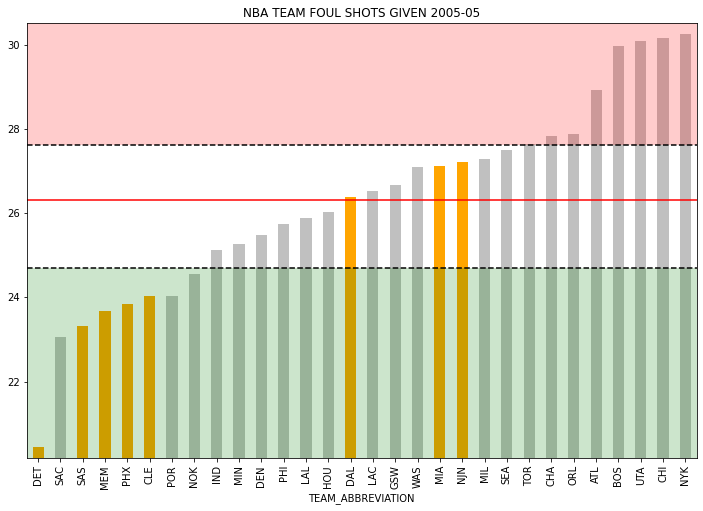

In [291]:
def_stats_grapher('FTA')

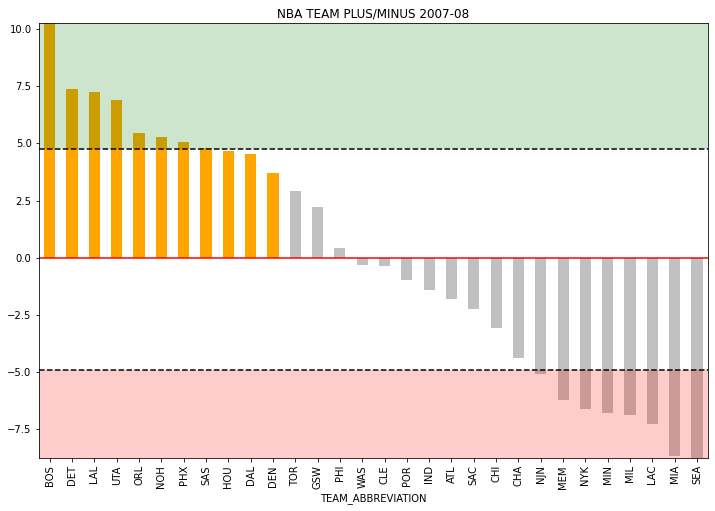

In [420]:
off_stats_grapher('PLUS_MINUS')